# Курсовой проект

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [2]:
DATASET_PATH = './train.csv'

In [3]:
train_df = pd.read_csv(DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


## Снижение занимаемой памяти

In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [5]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

## Анализ

In [7]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315720,37.199665,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,4859.01902,43.587592,0.839522,21.058716,86.241219,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,4169.50000,20.000000,1.000000,41.774879,22.769833,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,8394.50000,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,12592.50000,75.000000,2.000000,65.900627,45.128803,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,16798.00000,209.000000,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


### 1. DistrictID

In [8]:
# counts = train_df['DistrictId'].value_counts()
    
# plt.figure(figsize=(12,5))    
# plt.title('DistrictId')
# sns.barplot(counts.index, counts.values, log=True)
    
# plt.show()

1.Вывод DistrictID. Все данные присутствуют, особо неадекватных не вижу.

.

### 2. Rooms > 5, Rooms == 0

2. Rooms > 5

In [9]:
train_df[train_df['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2004,5927,57,10.0,59.056976,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.312500
2728,14865,9,10.0,60.871265,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.265625
6088,8491,1,19.0,42.006046,21.779287,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.617188
8794,14003,99,6.0,59.414333,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.968750


In [10]:
train_df[(train_df['Rooms'] == 1)]['Square'].mean(), train_df[(train_df['Rooms'] == 1)]['LifeSquare'].mean()

(41.32324981689453, 25.159000396728516)

In [11]:
train_df[(train_df['Rooms'] == 2)]['Square'].mean(), train_df[(train_df['Rooms'] == 2)]['LifeSquare'].mean()

(56.7883186340332, 35.97189712524414)

2. Вывод Rooms > 5. В соответствии со средними значениями Square и LifeSquare для 1 и 2 комнатных квартир и Price:

In [12]:
#   1. ID 5927, 14865, 14003 - исправить Rooms на 2.
train_df.loc[(train_df['Rooms'] == 10) | (train_df['Rooms'] == 6), 'Rooms'] = 2

In [13]:
#   2. ID 8491 - исправить Rooms на 1.
train_df.loc[train_df['Rooms'] == 19, 'Rooms'] = 1

2. Rooms == 0

In [14]:
train_df[train_df['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.109375
3780,7317,27,0.0,41.790882,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976562
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.343750
6401,9443,27,0.0,87.762619,85.125473,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.921875
7644,7917,27,0.0,212.932358,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.250000
7929,456,6,0.0,81.491447,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.796875
9767,12638,27,0.0,138.427689,136.215500,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.750000
9869,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.945312


In [15]:
train_df[(train_df['Rooms'] == 4)]['Square'].mean(), train_df[(train_df['Rooms'] == 4)]['LifeSquare'].mean()

(98.37753295898438, 65.66706848144531)

2. Вывод Rooms == 0. В соответствии со средними значениями Square и LifeSquare для квартир и Price:

In [16]:
#  1. ID 3159, 7317, 770 - исправить Rooms на 1.
train_df.loc[(train_df['Id'] == 3159) | (train_df['Id'] == 7317) | (train_df['Id'] == 770), 'Rooms'] = 1

In [17]:
#   2. ID 9443, 456 - исправить Rooms на 4.
train_df.loc[(train_df['Id'] == 9443) | (train_df['Id'] == 456), 'Rooms'] = 4

In [18]:
#   Остальное удалить
train_df.drop(train_df[train_df['Id'] == 7917].index, axis=0, inplace=True)
train_df.drop(train_df[train_df['Id'] == 12638].index, axis=0, inplace=True)
train_df.drop(train_df[train_df['Id'] == 3224].index, axis=0, inplace=True)

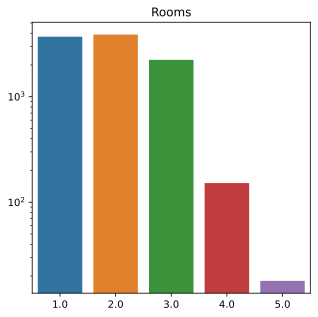

In [19]:
# Теперь Rooms в порядке.

counts = train_df['Rooms'].value_counts()
    
plt.figure(figsize=(5,5))    
plt.title('Rooms')
sns.barplot(counts.index, counts.values, log=True)
    
plt.show()

### 3. Square (Посмотреть большие площади, max сильно отличается от mean)

(array([1.200e+01, 3.200e+01, 1.632e+03, 3.294e+03, 2.379e+03, 1.274e+03,
        9.580e+02, 2.150e+02, 9.100e+01, 5.800e+01, 2.400e+01, 4.000e+00,
        6.000e+00, 8.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.1368588,  13.935426 ,  26.733992 ,  39.53256  ,  52.331123 ,
         65.12969  ,  77.92826  ,  90.72682  , 103.52539  , 116.32396  ,
        129.12253  , 141.9211   , 154.71965  , 167.51822  , 180.31679  ,
        193.11536  , 205.91393  , 218.7125   , 231.51106  , 244.30962  ,
        257.1082   , 269.90677  , 282.70532  , 295.50388  , 308.30246  ,
        321

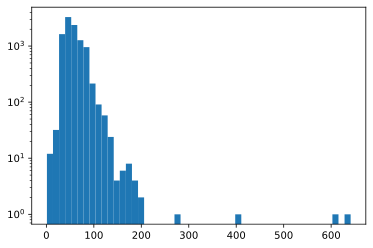

In [20]:
plt.hist(train_df['Square'], bins=50, log=True)

In [21]:
# посмотрим на Square > 210
train_df.loc[(train_df['Square'] > 210)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
726,28,9,2.0,604.705994,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.250000
1906,5548,86,5.0,275.645294,233.949310,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.875000
7010,2307,102,1.0,409.425171,410.639740,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.429688
9229,11602,30,2.0,641.065186,638.163208,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.687500


3. Вывод Square.

5548 адекватное

28, 2307, 11602 разделим на 10 Square и LifeSquare (делая вывод из цены примерно соответствующей цене для Rooms)

In [22]:
for i in train_df['Id']:
    if i in (28, 2307, 11602):
        train_df.loc[(train_df['Id'] == i), 'Square'] = train_df.loc[(train_df['Id'] == i), 'Square'] / 10

In [23]:
for i in train_df['Id']:
    if i in (2307, 11602):
        train_df.loc[(train_df['Id'] == i), 'LifeSquare'] = train_df.loc[(train_df['Id'] == i), 'LifeSquare'] / 10

In [24]:
train_df[train_df['Id'].isin([28, 2307, 11602])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
726,28,9,2.0,60.470600,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.250000
7010,2307,102,1.0,40.942516,41.063972,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.429688
9229,11602,30,2.0,64.106522,63.816322,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.687500


Случай когда LifeSquare > Square обработаем потом

### 4. LifeSquare (Посмотреть большие жилые площади, max сильно отличается от mean)

(array([7.872e+03, 1.000e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([3.7061942e-01, 1.4997505e+02, 2.9957950e+02, 4.4918393e+02,
        5.9878833e+02, 7.4839276e+02, 8.9799719e+02, 1.0476017e+03,
        1.1972061e+03, 1.3468105e+03, 1.4964149e+03, 1.6460194e+03,
        1.7956238e+03, 1.9452283e+03, 2.0948328e+03, 2.2444370e+03,
        2.3940415e+03, 2.5436460e+03, 2.6932505e+03, 2.8428547e+03,
        2.9924592e+03, 3.1420637e+03

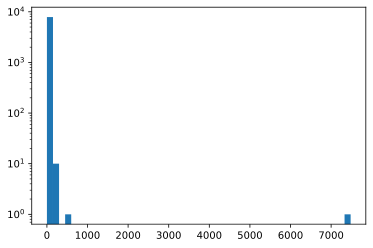

In [25]:
plt.hist(train_df['LifeSquare'], bins=50,  log=True)

In [26]:
train_df.loc[(train_df['LifeSquare'] > 200)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
357,14990,23,2.0,48.449875,263.542023,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.234375
1776,16568,27,4.0,200.334534,201.627365,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.500000
1906,5548,86,5.0,275.645294,233.949310,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.875000
5183,15886,85,3.0,78.059334,461.463623,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.312500
8000,16550,27,3.0,81.694420,7480.592285,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.500000


14990, 15886 LifeSquare разделить на 10

16568, 5548 адекватные

16550 LifeSquare разделить на 20